
# **Reto Final - Reconocimiento en Tiempo Real Señales de Trafico - Parte 1 (Creación Modelo)**
<img src="https://www.udistrital.edu.co/sites/default/files/contenido-estatico/imagenes/escudo_ud.gif" align="left" width="200px" height="200px"/>

> Miguel Angel Fuentes Ramirez - **COD. 20182005007**

<br>Scripts Disponibles en : </br>
[![Miguel Angel Fuentes Ramirez](https://img.shields.io/badge/MiguelAFuentesR-github-br?style=flat-square)](https://github.com/MiguelAFuentesR/Ciencia_de_Datos)
[![License](https://img.shields.io/badge/license-MIT-green)](https://opensource.org/licenses/MIT)

Este Archivo presenta la explicación paso a paso de la propuesta para la solución del Reto Final,el reto se divide en 2 partes, la primera en la creación de la red neuronal y la segunda en la comprobación del sistema en tiempo real ,  para probar el programa realizarlo en: 

[![Miguel Angel Fuentes Ramirez](https://colab.research.google.com/img/colab_favicon.ico)](https://colab.research.google.com/drive/1Py4hhaS33fDjnkL_ky7s2vEk318c5tnj?usp=sharing) 


Reto Propuesto : 

Desarrolar un sistema automático de reconocimiento de señales de tránsito, utilizando redes neuronales convolucionales.

- El sistema debe reconocer la señal en tiempo real utilizando la cámara del computador.
- El conjunto de datos debe tener como mínimo 3 clases de señales de tránsito.

-El sistema fue entrenado para reconocer 42 Clases de señales de trafico , presentando una funcionalidad de 38/42 y un porcentaje de acierto superior al 95% , la deteccion se realizo empleando redes neuronales Convolucionales con Tensorflow y Keras , Para la detección en tiempo real se realizo  Utilizando Javascript en google Colab y Opencv.

- Codigo Javascript Utilizado : https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb
  https://colab.research.google.com/drive/1xdjyBiY75MAVRSjgmiqI7pbRLn58VrbE?usp=sharing


Trabajo Elaborado para la Asignatura Ciencia de Datos

  - Parte 2 : Prueba en Tiempo Real : https://colab.research.google.com/drive/1Py4hhaS33fDjnkL_ky7s2vEk318c5tnj#scrollTo=b_ctM8hzcVtn 
  - Dataset Utilizado : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


























In [2]:

# Libreria para arreglos multidimensionales
import numpy as np
import pandas as pd
import cv2

# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerías para obtener métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style

# Librerías propias para las redes neuronales por convolución

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

print("Librerias Importadas exitosamente","Ruta de trabajo :",os.getcwd())


Librerias Importadas exitosamente Ruta de trabajo : /content


In [3]:
# Montar el drive en el entorno de trabajo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [18]:
#---------------- Carga de Datos ------------------- 
# Rutas de los conjuntos de imagenes
#EL nombre de la carpeta es el target 

import os
Root = "/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Data/"
os.chdir(Root)

data_dir = "/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Data/"
train_path = 'Train'
test_path = 'Test'

# Se reescalan las imagenes de  30x30x3 (RGB)
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

#Obtener el numero de clases del conjunto de datos 

NUM_CATEGORIES = len(os.listdir(train_path))
num_classes = NUM_CATEGORIES
NUM_CATEGORIES

43

El siguiente diccionario contiene todas las señales de trafico que es capaz de identificar el sistema . 

In [21]:
# TIpos de Señales de transito que reconoce el sistema 
classes = { 0:'Limite de velocidad (20 km/h)',
            1:'Limite de velocidad (30 km/h)',
            2:'Limite de velocidad (50 km/h)',
            3:'Limite de velocidad (60 km/h)',
            4:'Limite de velocidad (70 km/h)',
            5:'Limite de velocidad (80 km/h)',
            6:'Fin del límite de velocidad (80 km/h)',
            7:'Limite de velocidad (100 km/h)',
            8:'Limite de velocidad (120 km/h)',
            9: 'Prohibido pasar',
            10: 'Prohibido pasar vehiculos de mas de 3,5 toneladas',
            11:'Derecho de paso en la intersección',
            12:'Carretera prioritaria',
            13:'Ceda el paso',
            14: 'Alto',
            15:'Prohibido el Paso Vehicular',
            16:'Veh > 3,5 toneladas prohibido',
            17:'No pase',
            18:'Precaucion general',
            19:'Curva peligrosa a la izquierda',
            20:'Curva peligrosa a la derecha',
            21:'Doble curva',
            22: 'Camino lleno de baches',
            23: 'Camino resbaladizo',
            24: 'El camino se estrecha a la derecha',
            25:'Obras en la carretera',
            26:'Semaforos',
            27: 'Peatones',
            28:'Niños cruzando',
            29:'Cruce de bicicletas',
            30: 'Cuidado con el hielo/la nieve',
            31: 'Cruce de animales salvajes',
            32:'Velocidad final + límites de paso',
            33: 'Gire a la derecha adelante',
            34: 'Gira a la izquierda adelante',
            35: 'Solo adelante',
            36:'Seguir recto o a la derecha',
            37: 'Seguir recto o a la izquierda',
            38: 'Mantengase a la derecha',
            39: 'Mantengase a la izquierda',
            40:'Rotonda obligatoria',
            41: 'Fin - no pasar',
            42: 'Fin - no pasar veh. > 3,5 toneladas'}

## Conteo de Elementos 

En esta sección se obtiene el numero de muestras tomadas para el entrenamiento de la red 

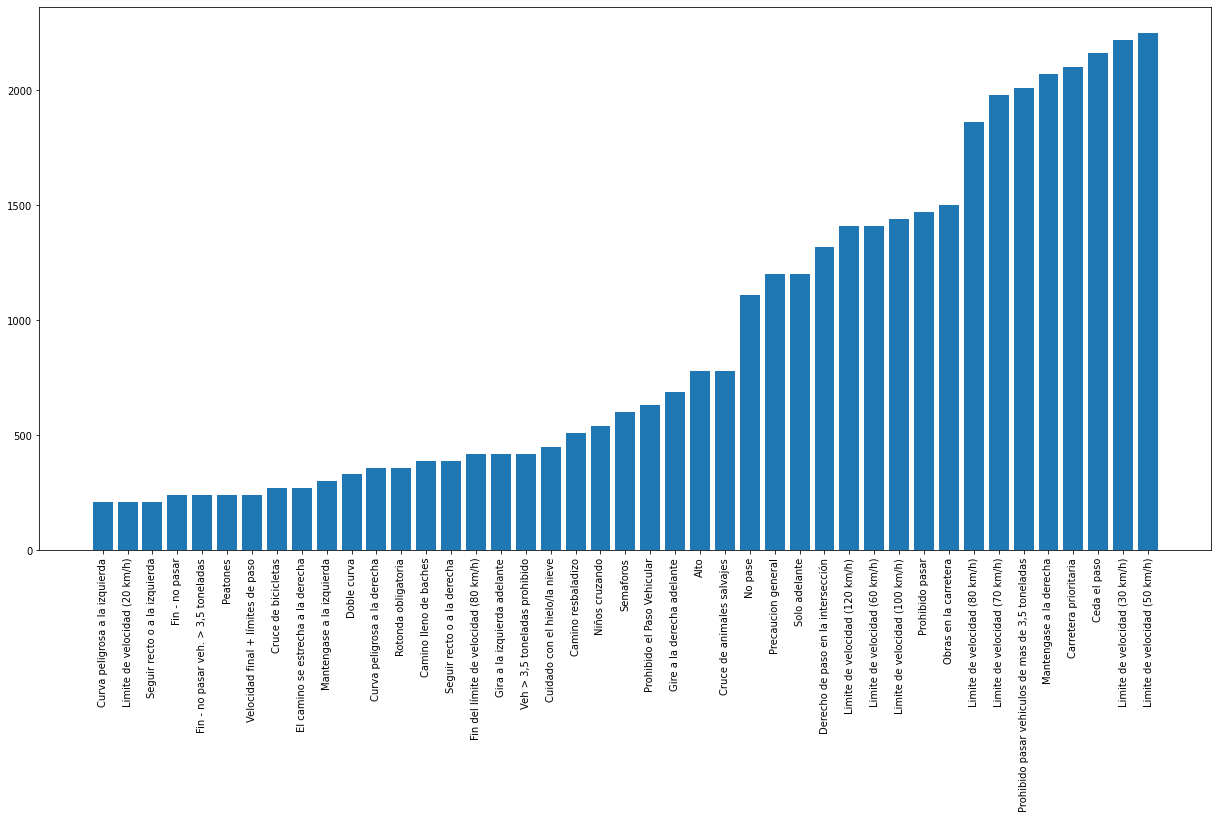

In [22]:
folders = os.listdir(train_path) # Ruta del set de entrenamiento 
train_number = [] #Numero de datos de entrenamiento 
class_num = [] #Numero de Clases

#Recorre los folders dentro de la ruta de entrenamiento , como se conoce el nombre de las carpetas es el target , Cada vez que encuentra 
#una carpeta nueva se agrega a la cantidad de clases y obtiene el tamaño de esta carpeta (Numero de Muestras)
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Ordenar el dataset con base a todas las clases 
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Graficar el numero de imagenes de cada clase 
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

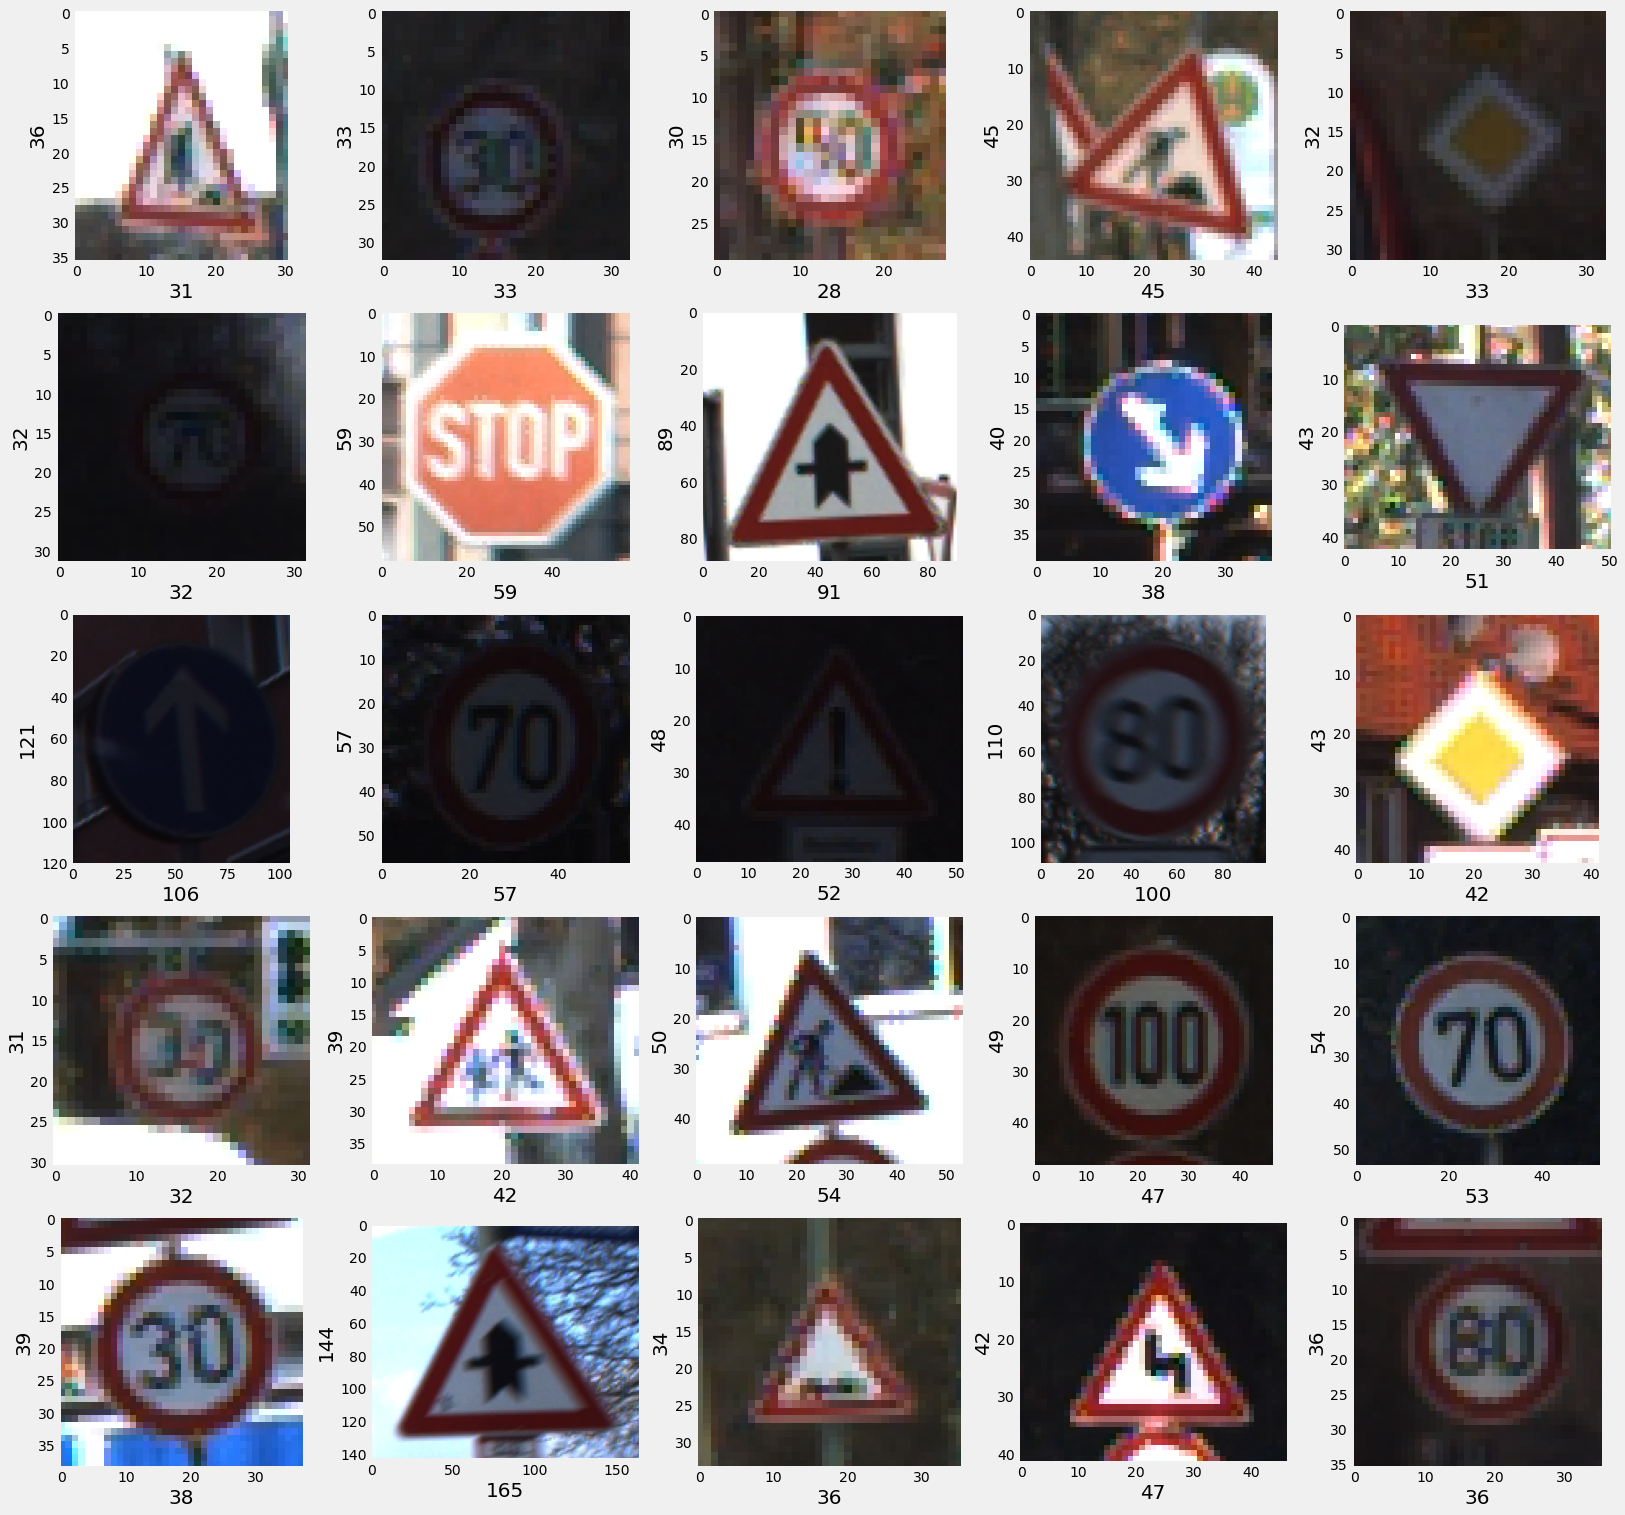

In [ ]:
# En este apartado se visualizan 25 imagenes random del dataset 
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Procesamiento de las Imagenes : 

In [6]:
# En este Apartado se reunen todas las imagenes del conjunto de datos para posteriormente obtener el set de entrenamiento 

from matplotlib.image import imread
from PIL import Image
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + 'Train/' + str(i) #Directorio de Entrenamiento - Se itera entre la carpeta 0 y la 42 
    images = os.listdir(path)

    for img in images:
        try:
          #Se procesan las imagenes del dataset como un conjunto de arreglos para que pueda ser entrenada la red 
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Se cambia de una lista a un arreglo de numpy 
image_data = np.array(image_data)
image_labels = np.array(image_labels)

#Se obtienen las dimensiones del conjunto de entrenamiento , en este caso son 39208 elementos de 30x30x3 
print(image_data.shape, image_labels.shape)

(39208, 30, 30, 3) (39208,)


In [7]:
#Se crea un intervalo de 0 a 39208,  con los dimensiones obtenidas del conjunto de datos 
shuffle_indexes = np.arange(image_data.shape[0])

'''
np.random.shuffle : Esta función solo baraja la matriz a lo largo del primer eje de una matriz multidimensional. 
Se cambia el orden de los subconjuntos, pero su contenido sigue siendo el mismo.
'''
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes] #Se organizan las imagenes de manera aleatoria 
image_labels = image_labels[shuffle_indexes]

In [8]:
#Separar los datos en los cojuntos de entrenamiento  y validación 

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

#Normalizar los valores del conjunto de entrenamiento 
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27445, 30, 30, 3)

X_valid.shape (11763, 30, 30, 3)

y_train.shape (27445,)

y_valid.shape (11763,)


In [9]:
#A los labels se les agrega una categoria de acuerdo al numero de clases detectadas en el set de datos 

y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27445, 43)

(11763, 43)


## DISEÑO DE LA RED NEURONAL CONVOLUCIONAL : Construcción y Compilación

In [24]:
#Construir red neuronal convolucional secuencial con keras   : Se define la Creación como un modelo secuencial 
# Se añaden las capas y sus hiperparámetros : 
model = keras.models.Sequential([    
    
    #Capa 1 con 32 kernels y cada kernel de 3x3
    # Se aplican 16 Filtros , los filtros determinan la cantidad de kernels para convolucionar con el volumen de entrada. 
    # Cada una de estas operaciones produce un mapa de activación 2D.
    #input_shape=(30, 30, 3) Se indica el tamaño de la imagen de la entrada  y R G B = 3 
    # Se aplica Relu : Se elimina los valores que no son utiles para el entrenamiento (peso negativo)
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    #Segunda capa (Iteración 2)
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    #Se aplica maxpooling la imagen se reduce en la mitad 
    keras.layers.MaxPool2D(pool_size=(2, 2)), #15 x 15
    keras.layers.BatchNormalization(axis=-1), # Se normaliza el batch haciendo una corrección en el eje 
    
    #Se aumentan los filtros 
    #Tercera capa (Iteración 3)
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    #Cuarta capa (Iteración 4)
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)), #7 x 7
    keras.layers.BatchNormalization(axis=-1),

    #Ya la matriz paso de 30x30 a 7x7 , pero se tienen muchisimas , una imagen se convierte en 30 por la cantidad de mascaras , cada vez que le aplico convolucion
    # La capa de salida debe tener el mismo número de clases para esto se utiliza dense 
    keras.layers.Flatten(),# Vector columna 
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    #El 20% de las neuronas se apagan para reducir el sobreentrenamiento 
    keras.layers.Dropout(rate=0.5),
    #Red neuronal normal de 43 neuronas  y se pasa a porcentaje con softmax 
    keras.layers.Dense(43, activation='softmax')
])

**Compilacion Modelo :**

In [11]:
#---------------------------Compilacion Modelo-----------------: 
    
#Se crea el objeto del modelo y las funciones de perdida , optimizacion y las metricas 
#La perdida se va  hacer con una entropia cruzada : es la mejor para clasificacion multiclase , indica que tan lejos estoy de la realidad 
#Funcion de optimizacion (gradiente adam) , adam : adaptativo es el mas utilizado 
#Metrica para estar revisando (accuracy), para ir mirando precision etapa por etapa 
#Se implmentaran 30 epocas en total para el entrenamiento 
epochs = 30
opt = Adam(learning_rate=0.001, decay=0.001/(epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 16)        448       

                                                                 

 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      

                                                                 

 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         

 )                                                               

                                                                 

 batch_normalization (BatchN  (None, 13, 13, 32)       128       

 ormalization)                                                   

                                                                 

 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     

                                                                 

 conv2d_3 (Conv2D)           (None, 9, 9

In [25]:
# Se Crea un generador de imagenes para la creacion del modelo 
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

**** 

##**Entrenamiento :**

In [13]:
#--------------------------- Entrenamiento -------------------- : 
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30

858/858 [==============================] - 111s 128ms/step - loss: 1.1505 - accuracy: 0.6912 - val_loss: 0.1437 - val_accuracy: 0.9555

Epoch 2/30

858/858 [==============================] - 109s 127ms/step - loss: 0.2023 - accuracy: 0.9377 - val_loss: 0.0776 - val_accuracy: 0.9752

Epoch 3/30

858/858 [==============================] - 111s 129ms/step - loss: 0.1187 - accuracy: 0.9643 - val_loss: 0.0747 - val_accuracy: 0.9776

Epoch 4/30

858/858 [==============================] - 108s 126ms/step - loss: 0.0835 - accuracy: 0.9738 - val_loss: 0.0172 - val_accuracy: 0.9950

Epoch 5/30

858/858 [==============================] - 111s 129ms/step - loss: 0.0680 - accuracy: 0.9796 - val_loss: 0.0133 - val_accuracy: 0.9957

Epoch 6/30

858/858 [==============================] - 108s 126ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0135 - val_accuracy: 0.9957

Epoch 7/30

858/858 [==============================] - 109s 127ms/step - loss: 0.0529 - accuracy: 0.9836 - val_l

In [26]:
#Guardar el Modelo de Forma local , para utilizarlo despues 

model.save("/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Modelo_Final_Trafico.h5")

In [27]:
#Guardar  los pesos del modelo  de Forma local , para utilizarlo despues 

model.save_weights("/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Weights.h5")

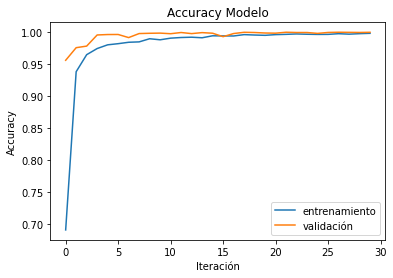

In [28]:
# Gráfica de la métrica de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()

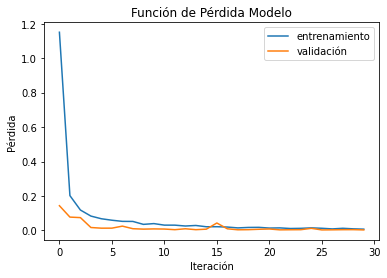

In [17]:
# Gráfica de la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()